In [21]:
%pip install pyalex


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [23]:
# コンセプトがnuclear fusionである論文を取得
pager = Works().filter(concepts={"id": "C69285833"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works", "cited_by_count"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13296
13296


In [24]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

cited_counts = pd.Series(
    {work['id']: work['cited_by_count'] for work in works_json},
    name='cited_count'
)
cited_counts.index.name = 'eid'

ref_counts = pd.Series(
    {work['id']: len(work['referenced_works']) for work in works_json},
    name='ref_count'
)
ref_counts.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, cited_counts, ref_counts, citations_df, team_sizes)

eid
https://openalex.org/W1504175299    1984
https://openalex.org/W2098917946    2001
https://openalex.org/W2131132747    1989
https://openalex.org/W2071478636    1977
https://openalex.org/W2082893749    1980
                                    ... 
https://openalex.org/W599238338     1993
https://openalex.org/W73639770      1993
https://openalex.org/W76239604      1993
https://openalex.org/W964608527     1993
https://openalex.org/W97460824      1993
Name: year, Length: 13295, dtype: int64

eid
https://openalex.org/W1504175299    1795
https://openalex.org/W2098917946    1197
https://openalex.org/W2131132747    1027
https://openalex.org/W2071478636     983
https://openalex.org/W2082893749     929
                                    ... 
https://openalex.org/W599238338        0
https://openalex.org/W73639770         0
https://openalex.org/W76239604         0
https://openalex.org/W964608527        0
https://openalex.org/W97460824         0
Name: cited_count, Length: 13295, dtype: int64

eid
https://openalex.org/W1504175299      0
https://openalex.org/W2098917946    713
https://openalex.org/W2131132747      1
https://openalex.org/W2071478636     26
https://openalex.org/W2082893749     20
                                   ... 
https://openalex.org/W599238338       0
https://openalex.org/W73639770        8
https://openalex.org/W76239604        0
https://openalex.org/W964608527       0
https://openalex.org/W97460824        0
Name: ref_count, Length: 13295, dtype: int64

,source,target
0,https://openalex.org/W34524112,https://openalex.org/W2098917946
1,https://openalex.org/W38100226,https://openalex.org/W2098917946
2,https://openalex.org/W60233603,https://openalex.org/W2098917946
3,https://openalex.org/W67476686,https://openalex.org/W2098917946
4,https://openalex.org/W77654273,https://openalex.org/W2098917946
...,...,...
172625,https://openalex.org/W2032321079,https://openalex.org/W73639770
172626,https://openalex.org/W2034818776,https://openalex.org/W73639770
172627,https://openalex.org/W2061844309,https://openalex.org/W73639770
172628,https://openalex.org/W2080024949,https://openalex.org/W73639770


eid
https://openalex.org/W1504175299     1
https://openalex.org/W2098917946    12
https://openalex.org/W2131132747     2
https://openalex.org/W2071478636     1
https://openalex.org/W2082893749     1
                                    ..
https://openalex.org/W599238338      1
https://openalex.org/W73639770       1
https://openalex.org/W76239604       1
https://openalex.org/W964608527      2
https://openalex.org/W97460824       3
Name: team_size, Length: 13295, dtype: int64

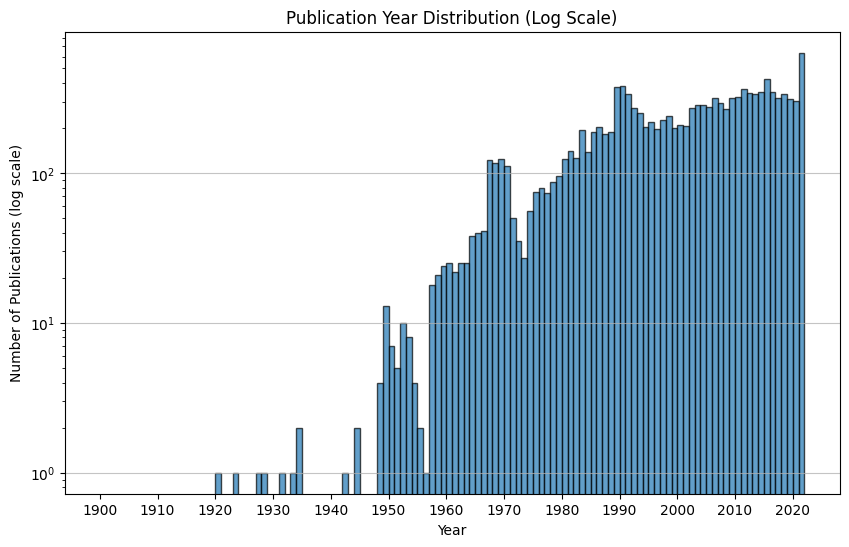

In [25]:
# yearsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(years, bins=range(1900, 2023), edgecolor='black', alpha=0.7, log=True)
plt.title("Publication Year Distribution (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Number of Publications (log scale)")
plt.xticks(range(1900, 2023, 10))
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

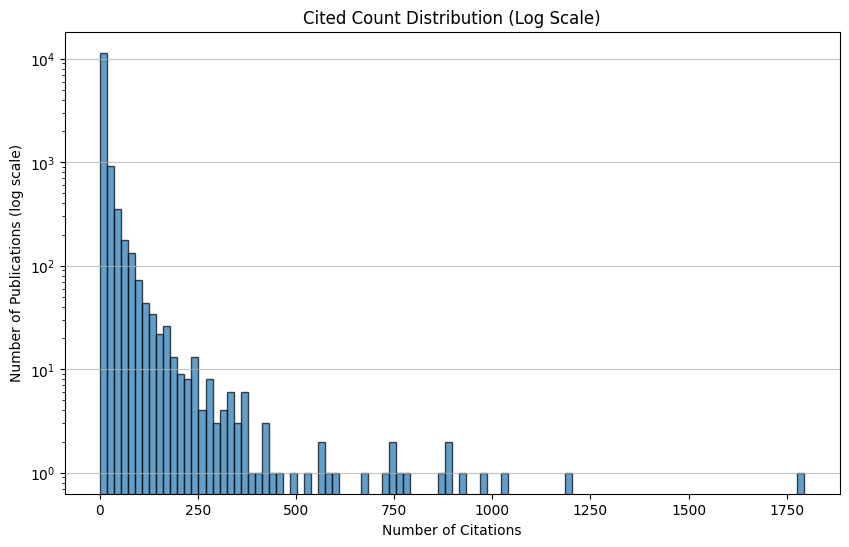

In [26]:
# cited_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(cited_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("Cited Count Distribution (Log Scale)")
plt.xlabel("Number of Citations")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

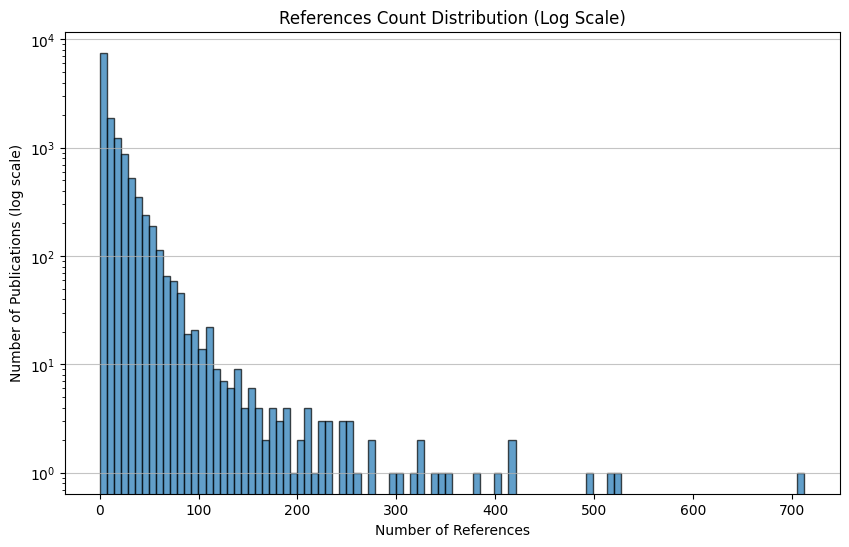

In [27]:
# ref_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(ref_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("References Count Distribution (Log Scale)")
plt.xlabel("Number of References")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

In [28]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

,target,source
https://openalex.org/W1000084,[https://openalex.org/W75026663],NaN
https://openalex.org/W1000221432,[https://openalex.org/W2170043674],NaN
https://openalex.org/W100056977,[https://openalex.org/W2069604179],NaN
https://openalex.org/W100074903,"[https://openalex.org/W2794630088, https://ope...",NaN
https://openalex.org/W1001019399,[https://openalex.org/W2585585366],NaN
...,...,...
https://openalex.org/W99035349,NaN,"[https://openalex.org/W87486330, https://opena..."
https://openalex.org/W991797696,NaN,"[https://openalex.org/W1493375915, https://ope..."
https://openalex.org/W992533928,NaN,[https://openalex.org/W1554179798]
https://openalex.org/W99421347,NaN,"[https://openalex.org/W1208613646, https://ope..."


In [29]:
citations_gb['year'] = citations_gb.index.map(years)
citations_gb

,target,source,year
https://openalex.org/W1000084,[https://openalex.org/W75026663],NaN,NaN
https://openalex.org/W1000221432,[https://openalex.org/W2170043674],NaN,NaN
https://openalex.org/W100056977,[https://openalex.org/W2069604179],NaN,NaN
https://openalex.org/W100074903,"[https://openalex.org/W2794630088, https://ope...",NaN,1977.0
https://openalex.org/W1001019399,[https://openalex.org/W2585585366],NaN,NaN
...,...,...,...
https://openalex.org/W99035349,NaN,"[https://openalex.org/W87486330, https://opena...",1987.0
https://openalex.org/W991797696,NaN,"[https://openalex.org/W1493375915, https://ope...",2012.0
https://openalex.org/W992533928,NaN,[https://openalex.org/W1554179798],2013.0
https://openalex.org/W99421347,NaN,"[https://openalex.org/W1208613646, https://ope...",1990.0


In [30]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [31]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

,0,1,team_size
0,,,
https://openalex.org/W1000084,https://openalex.org/W1000084,NaN,NaN
https://openalex.org/W1000221432,https://openalex.org/W1000221432,NaN,NaN
https://openalex.org/W100056977,https://openalex.org/W100056977,NaN,NaN
https://openalex.org/W100074903,https://openalex.org/W100074903,NaN,2.0
https://openalex.org/W1001019399,https://openalex.org/W1001019399,NaN,NaN
...,...,...,...
https://openalex.org/W99035349,https://openalex.org/W99035349,NaN,1.0
https://openalex.org/W991797696,https://openalex.org/W991797696,NaN,5.0
https://openalex.org/W992533928,https://openalex.org/W992533928,NaN,5.0


In [32]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

,1,team_size
0,,
https://openalex.org/W1014504381,0.133333,5.0
https://openalex.org/W101972530,0.085714,2.0
https://openalex.org/W10201056,0.064516,2.0
https://openalex.org/W1021124941,0.500000,5.0
https://openalex.org/W102165754,0.046729,1.0
...,...,...
https://openalex.org/W942686669,0.024476,4.0
https://openalex.org/W963554890,0.187500,11.0
https://openalex.org/W97358550,0.029703,2.0


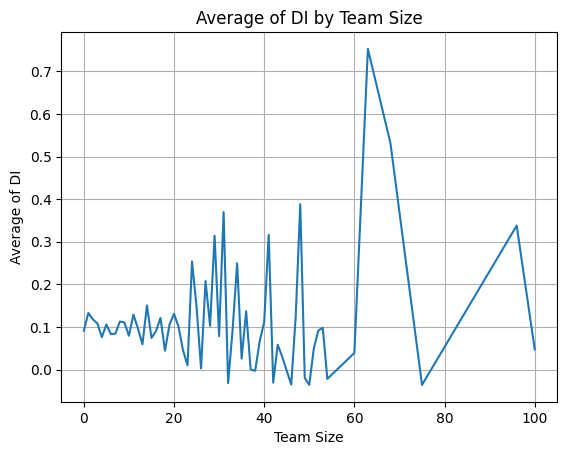

In [33]:
# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()

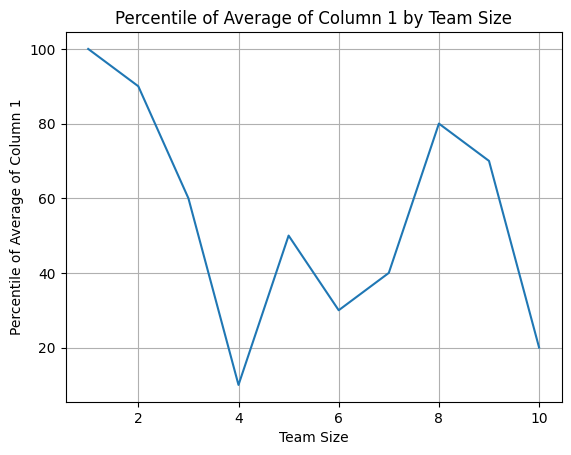

In [34]:
# team_sizeが1から10までのデータを抽出
filtered_df = scores_notna[scores_notna['team_size'].between(1, 10)]

# team_sizeごとにグループ化し、1というカラムの平均値を計算
grouped_df = filtered_df.groupby('team_size').mean()

# 全体の平均値のパーセンタイルを計算
percentiles = grouped_df.rank(pct=True) * 100

# グラフの描画
plt.plot(percentiles.index, percentiles[1])
plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size')
plt.grid(True)
plt.show()


In [35]:
scores_notna['year'] = years
scores_notna['cited_count'] = cited_counts
scores_notna['ref_count'] = ref_counts
scores_notna

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W1014504381,0.133333,5.0,2015,11,2
https://openalex.org/W101972530,0.085714,2.0,1998,10,5
https://openalex.org/W10201056,0.064516,2.0,1993,4,20
https://openalex.org/W1021124941,0.500000,5.0,2012,10,9
https://openalex.org/W102165754,0.046729,1.0,1990,19,11
...,...,...,...,...,...
https://openalex.org/W942686669,0.024476,4.0,1998,65,15
https://openalex.org/W963554890,0.187500,11.0,1982,9,5
https://openalex.org/W97358550,0.029703,2.0,1992,1,3


In [36]:
scores_filtered = scores_notna[(scores_notna['year'] < 2018) & (scores_notna['cited_count'] > 10) & (scores_notna['ref_count'] > 10)]
scores_filtered

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W102165754,0.046729,1.0,1990,19,11
https://openalex.org/W1054365188,0.077922,1.0,2015,16,18
https://openalex.org/W1137041869,-0.022491,21.0,2015,58,27
https://openalex.org/W1214965692,0.154676,7.0,2015,243,112
https://openalex.org/W121818447,0.071730,2.0,1994,19,47
...,...,...,...,...,...
https://openalex.org/W87917635,-0.003846,1.0,1993,23,17
https://openalex.org/W88527692,0.196721,3.0,2006,43,12
https://openalex.org/W90532932,0.404255,1.0,1998,17,40


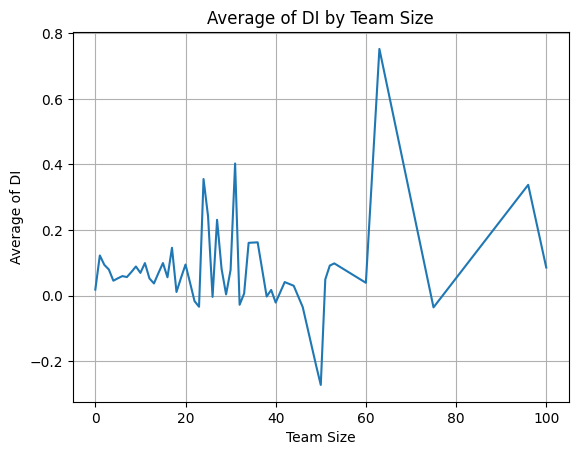

In [37]:
# team_sizeごとにグループ化
grouped_df = scores_filtered.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()

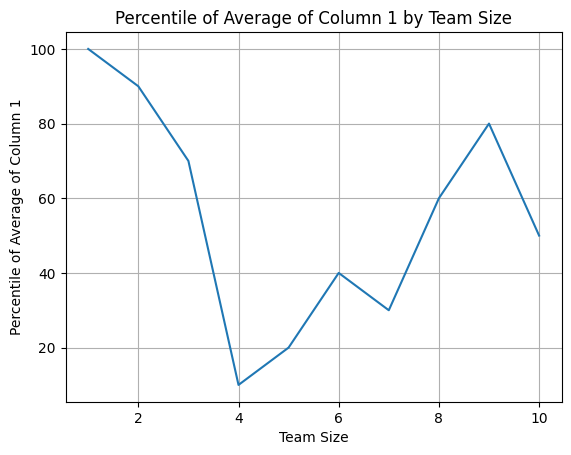

In [38]:
# team_sizeが1から10までのデータを抽出
filtered_df = scores_filtered[scores_filtered['team_size'].between(1, 10)]

# team_sizeごとにグループ化し、1というカラムの平均値を計算
grouped_df = filtered_df.groupby('team_size').mean()

# 全体の平均値のパーセンタイルを計算
percentiles = grouped_df.rank(pct=True) * 100

# グラフの描画
plt.plot(percentiles.index, percentiles[1])
plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size')
plt.grid(True)
plt.show()